In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [68]:
products = pd.read_csv("Products.csv")
customers = pd.read_csv("Customers.csv")
transaction = pd.read_csv("Transactions.csv")

# Products

In [69]:
products.shape

(100, 4)

In [70]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [71]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [72]:
products.Category.unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

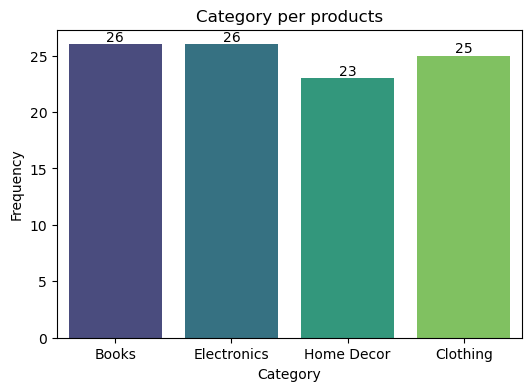

In [73]:
plt.figure(figsize=(6,4))

ax = sns.countplot(data=products, x='Category', hue='Category', palette='viridis', legend=False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center',  
                fontsize=10, color='black',  
                xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Category per products')

plt.show()

In [74]:
group = products.groupby('Category')['Price'].agg(['max','min','mean']).reset_index()
group.columns = ['Category','Max_Price','Min_Price','Avg_Price']
group['Avg_Price'] = group['Avg_Price'].round(2)
group

,Category,Max_Price,Min_Price,Avg_Price
0,Books,497.76,33.59,292.21
1,Clothing,481.78,18.82,263.72
2,Electronics,459.86,16.08,275.35
3,Home Decor,454.53,41.18,235.02


# Customers

In [75]:
customers.shape

(200, 4)

In [76]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [77]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


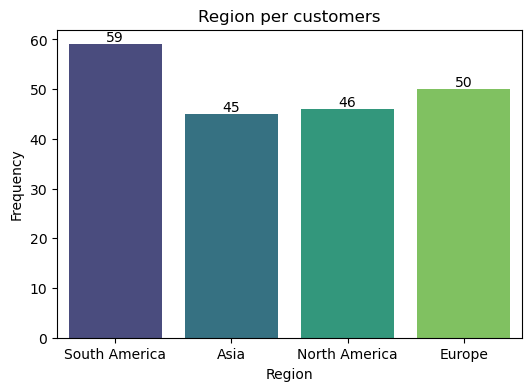

In [78]:
plt.figure(figsize=(6,4))

ax = sns.countplot(data=customers, x='Region', hue='Region', palette='viridis', legend=False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5),
                textcoords='offset points')


plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Region per customers')

plt.show()

# Transactions

In [79]:
transaction.shape

(1000, 7)

In [80]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [81]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [82]:
transaction['TransactionDate'] = pd.to_datetime(transaction['TransactionDate'])
transaction['Year'] = pd.DatetimeIndex(transaction['TransactionDate']).year
transaction['Month'] = pd.DatetimeIndex(transaction['TransactionDate']).month

In [83]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Year,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3


In [84]:
monthName = {
    1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',
    7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'
}

transaction['MonthName'] = transaction['Month'].map(monthName)

In [85]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Year,Month,MonthName
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8,August
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5,May
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4,April
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3,March
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3,March


### Yearly sales 

In [86]:
year_quantity = transaction.groupby('Year')['Quantity'].sum().reset_index()
year_quantity

,Year,Quantity
0,2023,12
1,2024,2525


In [87]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

### Monthly sales

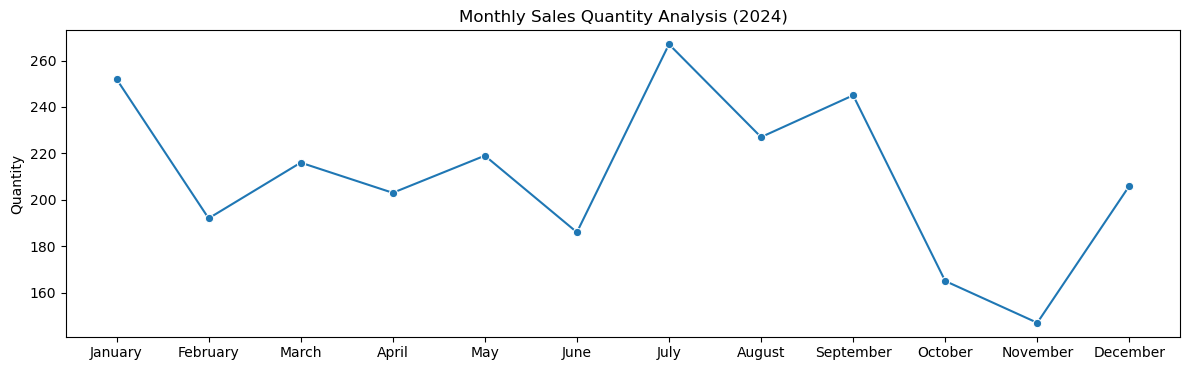

In [88]:
month_quantity = transaction.groupby(['Year','MonthName'])['Quantity'].sum().reset_index()

month_quantity['MonthName'] = pd.Categorical(
    month_quantity['MonthName'], 
    categories=month_order, 
    ordered=True
)

month_quantity = month_quantity.sort_values(['Year', 'MonthName']).reset_index(drop=True)

monthly_qunatity = month_quantity[month_quantity['Year'] == 2024]

plt.figure(figsize=(12,4))
sns.lineplot(data=monthly_qunatity,x='MonthName',y='Quantity',marker='o')
plt.xlabel(" ")
plt.ylabel("Quantity")
plt.title("Monthly Sales Quantity Analysis (2024)")
plt.tight_layout()

plt.show()

## Monthly Revenue

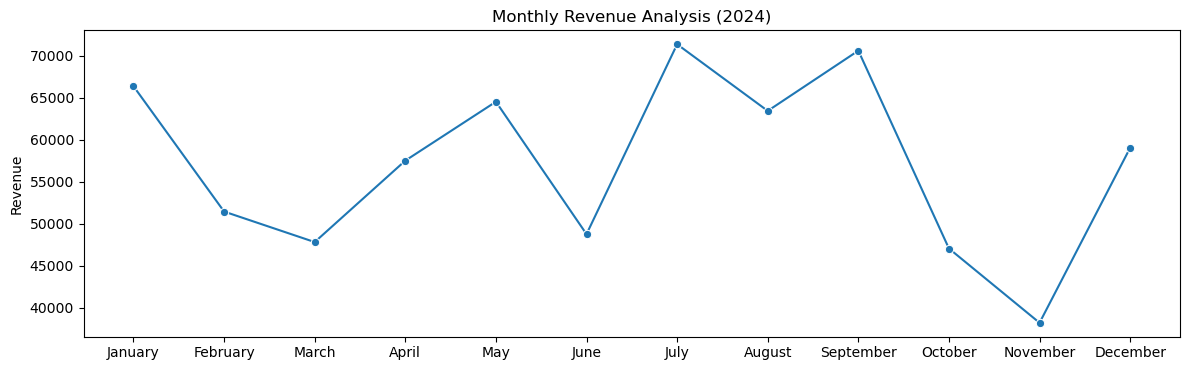

In [89]:
monthly_revenue = transaction.groupby(['Year','MonthName'])['TotalValue'].sum().reset_index()

monthly_revenue['MonthName'] = pd.Categorical(
    monthly_revenue['MonthName'], 
    categories=month_order, 
    ordered=True
)

monthly_revenue = monthly_revenue.sort_values(['Year', 'MonthName']).reset_index(drop=True)

monthly_revenue = monthly_revenue[monthly_revenue['Year'] == 2024]

plt.figure(figsize=(12,4))
sns.lineplot(data=monthly_revenue,x='MonthName',y='TotalValue',marker='o')
plt.xlabel(" ")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Analysis (2024)")
plt.tight_layout()

plt.show()

# Product-Transaction

In [126]:
df = pd.merge(products,transaction,on=['ProductID','Price'])

In [127]:
df.head()

,ProductID,ProductName,Category,Price,TransactionID,CustomerID,TransactionDate,Quantity,TotalValue,Year,Month,MonthName
0,P001,ActiveWear Biography,Books,169.3,T00088,C0019,2024-01-30 17:23:03,2,338.6,2024,1,January
1,P001,ActiveWear Biography,Books,169.3,T00314,C0024,2024-09-24 17:15:16,4,677.2,2024,9,September
2,P001,ActiveWear Biography,Books,169.3,T00428,C0071,2024-08-02 08:13:23,2,338.6,2024,8,August
3,P001,ActiveWear Biography,Books,169.3,T00433,C0036,2024-05-05 05:01:18,2,338.6,2024,5,May
4,P001,ActiveWear Biography,Books,169.3,T00449,C0191,2024-12-12 12:17:38,1,169.3,2024,12,December


In [128]:
df = df[df['Year'] == 2024]

In [129]:
category_quantity = df.groupby('Category')['Quantity'].agg('sum')

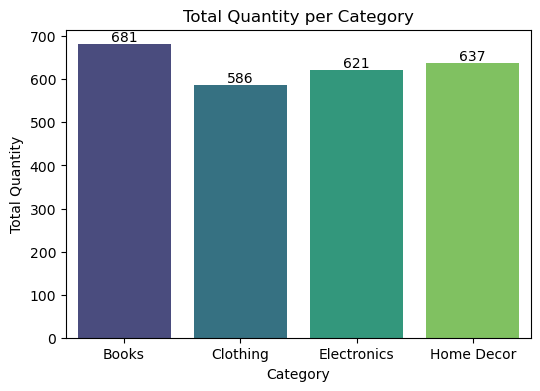

In [130]:
plt.figure(figsize=(6,4))

ax = sns.barplot(x=category_quantity.index, y=category_quantity.values,hue=category_quantity.index,palette='viridis',legend=False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.title('Total Quantity per Category')

plt.show()

### Inventory & Supply Chain Optimization

In [133]:
product_sales = df.groupby('ProductID')['TotalValue'].sum().reset_index()
product_sales.columns = ['productID', 'Total_Revenue']

In [136]:
inventory_turnover = product_sales['Total_Revenue'] / products['Price']
products['inventory_turnover'] = inventory_turnover
print("\nProducts with Lowest Turnover:")
products.sort_values(by='inventory_turnover').head()


Products with Lowest Turnover:


,ProductID,ProductName,Category,Price,inventory_turnover
30,P031,SoundWave Headphones,Electronics,196.40,9.0
98,P099,SoundWave Mystery Book,Books,354.29,11.0
23,P024,SoundWave Cookbook,Books,338.66,12.0
43,P044,ActiveWear Running Shoes,Clothing,18.82,13.0
59,P060,HomeSense T-Shirt,Clothing,155.65,13.0


In [138]:
products.sort_values(by='inventory_turnover').tail()

,ProductID,ProductName,Category,Price,inventory_turnover
78,P079,ActiveWear Rug,Home Decor,417.37,43.0
47,P048,TechPro Cookbook,Books,416.40,43.0
28,P029,TechPro Headphones,Electronics,433.64,45.0
58,P059,SoundWave Jeans,Clothing,303.20,46.0
53,P054,SoundWave Cookbook,Books,57.30,46.0


### Product Performance

In [140]:
category_product_sales = df.groupby(['Category','ProductName'])['Quantity'].agg('sum').reset_index()
category_product_sales = category_product_sales.sort_values(['Category', 'Quantity'], ascending=[True, False])
top_selling_product = category_product_sales.groupby('Category').first().reset_index()

In [141]:
top_selling_product

,Category,ProductName,Quantity
0,Books,SoundWave Cookbook,78
1,Clothing,ActiveWear Jacket,72
2,Electronics,ActiveWear Smartwatch,98
3,Home Decor,ActiveWear Rug,79


In [55]:
category_product_sales = category_product_sales.sort_values(['Category', 'Quantity'], ascending=[True, True])
Bottom_selling_product = category_product_sales.groupby('Category').first().reset_index()
Bottom_selling_product

,Category,ProductName,Quantity
0,Books,ActiveWear Biography,18
1,Clothing,SoundWave Jacket,16
2,Electronics,ComfortLiving Headphones,15
3,Home Decor,BookWorld Wall Art,15


In [56]:
total_revenue_per_category = df.groupby('Category')['TotalValue'].agg('sum').reset_index()
total_revenue_per_category

,Category,TotalValue
0,Books,192147.47
1,Clothing,164585.30
2,Electronics,178913.26
3,Home Decor,150580.01


# Customer-Transaction

In [96]:
df = pd.merge(customers,transaction,on='CustomerID')

In [97]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Year,Month,MonthName
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,2024,1,January
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,2024,9,September
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,2024,4,April
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,2024,5,May
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,2024,11,November


In [98]:
df = df[df['Year']==2024]

In [99]:
region_quantity = df.groupby('Region')['Quantity'].agg('sum')

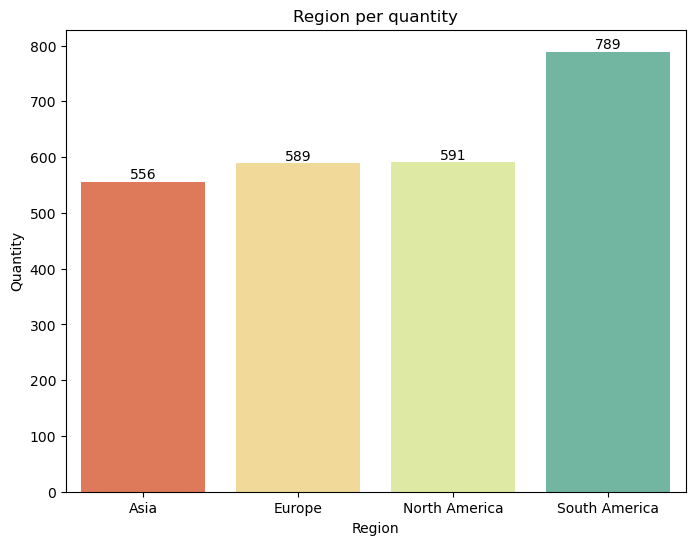

In [100]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x=region_quantity.index,y=region_quantity.values,hue= region_quantity.index,palette='Spectral')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.ylabel('Quantity')
plt.xlabel('Region')
plt.title('Region per quantity')

plt.show()

In [101]:
region_customer = df.groupby(['Region','CustomerName'])['Quantity'].agg('sum').reset_index()
region_customer = region_customer.sort_values(['Region','Quantity'],ascending=[True,False])
top_buying_customer_per_region = region_customer.groupby('Region').first().reset_index()

In [102]:
top_buying_customer_per_region

,Region,CustomerName,Quantity
0,Asia,Matthew Johnson,26
1,Europe,Misty Higgins,28
2,North America,Abigail Jones,32
3,South America,Juan Mcdaniel,30


In [103]:
region_customer = df.groupby(['Region','CustomerName'])['Quantity'].agg('sum').reset_index()
region_customer = region_customer.sort_values(['Region','Quantity'],ascending=[True,True])
least_buying_customer_per_region = region_customer.groupby('Region').first().reset_index()

In [104]:
least_buying_customer_per_region

,Region,CustomerName,Quantity
0,Asia,Tina Ford,1
1,Europe,Deborah Wilcox,2
2,North America,Zachary Turner,1
3,South America,Angela Williams,2


In [105]:
total_revenue_region = df.groupby('Region')['TotalValue'].agg('sum').reset_index()
total_revenue_region

,Region,TotalValue
0,Asia,150489.61
1,Europe,164981.91
2,North America,151401.96
3,South America,219352.56


## Product-Customer-Transaction

In [111]:
df = pd.merge(customers,transaction,on='CustomerID')

In [112]:
df = pd.merge(df,products,on=['ProductID','Price'])

In [113]:
df

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Year,Month,MonthName,ProductName,Category
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,2024,1,January,SoundWave Cookbook,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,2024,9,September,HomeSense Wall Art,Home Decor
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,2024,4,April,SoundWave Headphones,Electronics
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,2024,5,May,ActiveWear Smartwatch,Electronics
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,2024,11,November,TechPro Headphones,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,2024,12,December,HomeSense T-Shirt,Clothing
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,2024,4,April,ActiveWear Smartphone,Electronics
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,2024,7,July,HomeSense Desk Lamp,Home Decor
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,2024,9,September,TechPro Cookbook,Books


In [122]:
Region_Category_sales = df.groupby(['Region','Category'])['Quantity'].agg('sum').reset_index()
Region_Category_sales = Region_Category_sales.sort_values(['Region','Category'],ascending=[True,True])

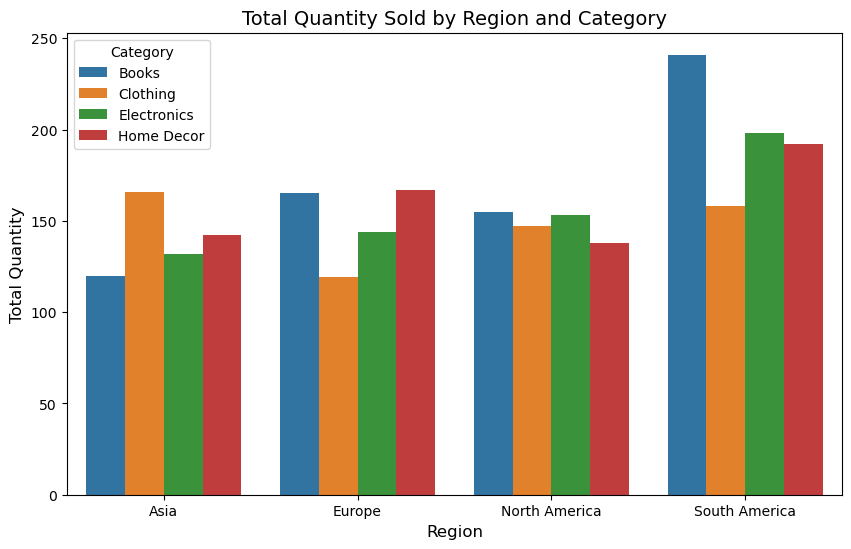

In [125]:
plt.figure(figsize=(10,6))

sns.barplot(data=Region_Category_sales,x='Region',y='Quantity',hue='Category')
plt.xlabel("Region", fontsize=12)  # X-axis label
plt.ylabel("Total Quantity", fontsize=12)  # Y-axis label
plt.title("Total Quantity Sold by Region and Category", fontsize=14)
plt.show()